# Kaggle's Titanic Competition

[Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)

## Data

We are provided with two datasets (`titanic-train.csv` and `titanic-test.csv`) with the following columns: <br>
name (`string`), pclass (Ticket class, `category`, `{1: 1st, 2: 2nd, 3: 3rd}`), sex (`category`), Age (`float`), sibsp (number of siblings, `int`), parch (number of parents, `int`), ticket (`int`), fare (`float`), cabin (`string`), embarked (Port of Embarkation, `category`, `{C: Cherbourg, Q: Queenstown, S: Southampton}`)

In addition, the `titanic-train.csv` dataset also includes the ground truth regarding whether each passenger survived: survival (`boolean`)

Our task is to develop a model that can accurately predict the survival variable for each row in the `titanic-test.csv` dataset.

<style>
/* CSS to change font size of code blocks */
pre {
    font-size: 12px; /* Adjust the font size as needed */
}
code {
    font-size: small; /* Adjust the font size as needed */
}
</style> 

## Exploratory Data Analysis

Take a closer look at your `titanic-train.csv` data set to understand what's going on.

In [22]:
import pandas as pd
from IPython.display import display

# Display the first few rows of the DataFrame
data_frame = pd.read_csv('./data/titanic-train.csv')
display(data_frame.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


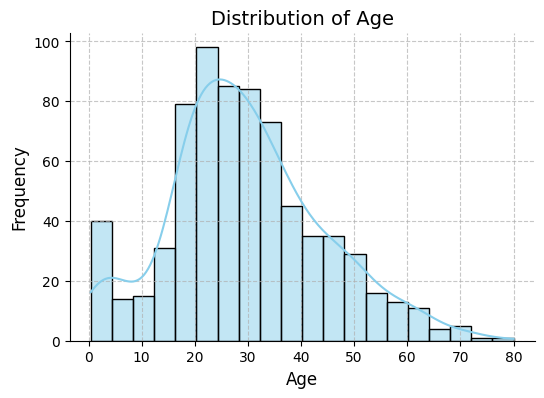

In [23]:
# Visualize the distribution of specific features
import matplotlib.pyplot as plt
import seaborn as sns

# Customize the appearance of the histogram
plt.figure(figsize=(6, 4))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Age', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

# Plot histogram for a specific column
sns.histplot(data_frame['Age'], color='skyblue', kde=True)

# Show the plot
plt.show()



## Data Preprocessing

### Handling Missing Values

Missing values can reduce the effectiveness of the model, as it may not have enough information to accurately learn the patterns in the data.

Depending on the context and characteristics of the dataset, using statistical values to fill missing data or disregarding them entirely can both be appropriate strategies. 

Be careful. Improperly handling the missing values can introduce bias in the estimates of model parameters.

#### Statistical Essentials

- **Average** (mean) - summing all values then dividing by the total number of values:
  - Sensitive to outliers
- **Median** - the middle value of a dataset when it's ordered from lowest to highest
  - A more robust in the presence of outliers or skewed distributions.
- **Mode** - most frequent value

In [24]:
# Check for missing values
missing_values = data_frame.isna().sum()

missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values'])
display(missing_values_df)

,Missing Values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Fill the missing values for 'Age' with the median age
data_frame['Age'].fillna(data_frame['Age'].median(), inplace=True)

In [ ]:
# Fill the missing values for 'Embarked' with the mode
mode_embarked = data_frame['Embarked'].mode()[0]
data_frame['Embarked'].fillna(mode_embarked, inplace=True)

In [27]:
# Drop the 'Cabin' column due to too many missing values
data_frame.drop(columns=['Cabin'], inplace=True)

### Encoding Categorical Variables

A categorical variable is a type of variable that can assume one of a limited number of possible values.

Since many machine learning algorithms require numerical input, categorical variables should be converted into a numerical format.

However, numerical values might be misinterpreted as having mathematical significance, introducing bias when they are merely labels. One-hot encoding is commonly employed to transform categorical variables into a format that preserves their categorical nature without implying ordinal relationships.

In [28]:
# Convert categorical variable 'Sex' into numerical representation
data_frame['Sex'] = data_frame['Sex'].map({'male': 0, 'female': 1})

In [29]:
# Perform one-hot encoding for 'Embarked' column
data_frame = pd.get_dummies(data_frame, columns=['Embarked'], prefix='Embarked')

### Feature Engineering (Optional)

Transforming existing features or creating new ones helps to improve the performance of your models. This requires a combination of data analysis, creativity, and domain expertise and is usually an iterative process, where you try different techniques, evaluate their impact on the model performance using validation techniques (e.g., cross-validation), and refine your features accordingly.

However, the potential dangers of poorly performed feature engineering are:

- **Overfitting**: Performing well on the training data but generalizing poorly to unseen data.

- **Data Leakage**: When information from the test set (or future data) inadvertently leaks into the training set during feature engineering.

- **High Dimensionality**: Resulting in increased computational complexity and sparsity of data.

- **Incorrect Assumptions**: Incorrect assumptions about the relationships between features and the target variable can lead to the creation of misleading features.

- **Loss of Interpretability**


In [30]:
# creating a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
data_frame['FamilySize'] = data_frame['SibSp'] + data_frame['Parch'] + 1


### Feature Selection (Optional)

Drop irrelevant features or those with low importance. Nonetheless, it's important not to lose valuable information that could be relevant for your model.

Typical approaches include: filter methods, wrapper methods, and embedded methods.

In [31]:
# dropping 'PassengerId', 'Name', 'Ticket', 'SibSp', and 'Parch'
data_frame.drop(columns=['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], inplace=True)


## Model Selection

Different types of problems (e.g., classification, regression, clustering) require various models. Furthermore, specific data types or assumptions about the data distribution yield better results with particular models.

Popular machine learning models include regressions, decision trees, support vector machines, neural networks, random forests, and gradient boosting.

Next, we will discuss into some of the most commonly used models for binary classification.

#### Linear and Logistic Regression

Linear Regression assumes a linear relationship between the predictor(s) and the target variable.

$$y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n$$

The values of the coefficients initially are set arbitrarily or based on some heuristics however, the optimum estimation of the values is often discovered while trying minimizes the sum of the squared differences between the observed and predicted values of the target variable. Given $X = (x_{1}, x_{2}, ...)$:

$$\text{SSE} = \sum_{i=1}^{n} (y_i -  f(X))^2$$

Since linear regression assumes a linear relationship between variables, it may not perform well with highly non-linear data.

Instead of fitting a straight line to the data, logistic regression fits an S-shaped curve (sigmoid function) to the data. The logistic (sigmoid) function has the following form:

$$p(y = 1 | x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n)}}$$

This $p(y=1∣x)$ represents the probability that the target variable $y$ is 1 given the input features x.

Maximum Likelihood or Gradient Descent are commonly used techniques for LR optimization.

#### Decision Tree

In this method, we recursively split the data into subsets based on different feature values to construct a tree-like structure. The splitting process continues until a stopping criterion is met, such as reaching a maximum depth, having a minimum number of data entries in a node, or no further improvement in impurity reduction. Each leaf node represents a class label (in classification) or a continuous value (in regression).

The most commonly used criteria for splitting at each node are Gini impurity and Information Gain (or entropy).

Example of a decision tree for predicting "Play Tennis" based on the features: Outlook (`category`, `{S: sunny, O: overcast, R: rainy}`), Temperature (`int`), Humidity (`int`), Wind (`category`, `{S: strong, W: weak}`).
```
Is Outlook Sunny?
|--- Yes --> Play Tennis
|--- No
     |--- Is Outlook Overcast?
          |--- Yes --> Play Tennis
          |--- No
               |--- Is Humidity High?
                    |--- Yes --> Don't Play Tennis
                    |--- No --> Play Tennis
```

Decision trees are simple and interpretable.

<style>
/* CSS to change font size of code blocks */
pre {
    font-size: 12px; /* Adjust the font size as needed */
}
code {
    font-size: small; /* Adjust the font size as needed */
}
</style> 

#### Random Forest

Unlike a single decision tree, this method constructs multiple independent trees during training, each using random subsets of the training data. Moreover, to introduce additional randomness, only a random subset of features is considered for splitting at each node. 

During prediction on the test set, each data point is passed through every decision tree in the forest. Each tree autonomously predicts the outcome based on its learned rules. The final prediction is determined by the majority vote for classification tasks or by averaging the predictions for regression tasks across all trees in the forest.

The Random Forest model improves performance, robustness, and generalization capabilities, especially with complex datasets. 

#### Gradient Boosting

Instead of independent trees, Gradient Boosting sequentially trains new models and hopes each model corrects the errors of its predecessor.

After the initial model is trained, Gradient Boosting calculates the residuals (the differences between the actual target values and the predictions) of this model, denoted as: $R_{1}$. 

Next, a new model is trained to predict $R_{1}$ resulting in the calculation of $R_{2}$

This iterative process continues with the aim of minimizing the residuals at each step.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

## Model Training

As mentioned before, the ultimate goal of machine learning is to develop a model that can make accurate predictions or decisions on new, unseen data (here, `./data/titanic-test.csv`). To achieve this, the model needs to learn the underlying patterns and relationships between the input data (features) and output (target variable), both of which are presented in `./data/titanic-train.csv`.

But how does the model actually *learn*? The model learns by iteratively predicting the target variables, calculate the the difference between the predictions and ground truth (the error or loss), and adjusting the its internal parameters (e.g., weights in neural networks) to minimize a specified *loss function*.

<style>
/* CSS to change font size of code blocks */
pre {
    font-size: 12px; /* Adjust the font size as needed */
}
code {
    font-size: small; /* Adjust the font size as needed */
}
</style> 

## Evaluation

To select the best model among the trained ones, we will assess their performance against a dataset that was not used during the training: the evaluation dataset.

Since we do not have a separate dataset for evaluation here, we will pick up 20% of the `titanic-train.csv` to be the evaluation dataset. Hence, we will train the model only on the remaining 80% of `titanic-train.csv`.

<style>
/* CSS to change font size of code blocks */
pre {
    font-size: 12px; /* Adjust the font size as needed */
}
code {
    font-size: small; /* Adjust the font size as needed */
}
</style> 

In [33]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
feature_variables = data_frame.drop(columns=['Survived'])
target_variable = data_frame['Survived']
## Split the feature variables and target variable into training and validation sets
## 20% of the data will be allocated to the validation set
feature_variables_train, feature_variables_evaluation, target_variable_train, target_variable_evaluation = train_test_split(feature_variables, target_variable, test_size=0.2, random_state=42)


### Evaluate Metrics

 The evaluation metrics indicate how well the model will perform on the test dataset.


#### Accuracy

Measures the ratio of correctly predicted instances to the total instances in the dataset.

$$
Accuracy = \frac{True Positives + True Negatives}{True Positives + False Positives + True Negatives + False Negatives}
$$

While this metric is easy to understand, it can be misleading when dealing with imbalanced datasets. For example, in a test dataset of size 100 where 90 of the instances belong to class A, the model can achieve 90% accuracy if it predicts class A for all instances:

$$
Accuracy = \frac{90 + 0}{90 + 10 + 0 + 0} = 0.9
$$

#### Precision (The Accuracy of The Positive Predictions)

Measures the ratio of correctly predicted positive instances to the total predicted positives. A

$$
Precision= \frac{True Positives}{True Positives + False Positives}
​$$

This metric is particularly useful when minimizing false positives is critical (e.g., in medical diagnosis).
But, it is not suitable in situations where false negatives are more costly than false positives.

Consider a model that needs to decide whether an email is spam on a test dataset that mostly consists of non-spam emails. If the model classifies all emails as non-spam (negative predictions), precision would be calculated as:

$$ Precision = \frac{0}{0 + 0} = undefined$$

In this case, precision does not provide any information about the unidentified positive instances.

#### Recall (Sensitivity)

Measures the ratio of correctly predicted positive instances to all actual positives in the dataset.x

$$
Recall= \frac{True Positives}{True Positives + False Negatives}
$$

Recall is important when the cost of false negatives is high, and it complements precision.

Consider a model which is tasked with detect fraudulent transactions in a banking system. In the test dataset of 100 records, fraudulent transactions are relatively rare, occurring in only about 1% of all transactions. Now, if a model marks all transactions as valid: 

$$
Recall= \frac{0}{0 + 10} = 0
$$

The recall of 0 does not offer useful insights into the model's ability to identify positive instances when confronted with an imbalanced dataset.


#### F1-Score

This score is a single metric that considers both false positives and false negatives.

$$
F1-score = 2 × \frac{Precision × Recall}{Precision + Recall}
$$

#### ROC AUC (Receiver Operating Characteristic Area Under the Curve)

This metric is specifically used for binary classification problems. First we need to define two parameters:

$$ True Positive Rate = \frac{True Positive}{True positive + True Negative} $$

Yes, TPR has the same definition as recall. And

$$ False Positive Rate = \frac{False Positive}{False positive + True Negative} $$

An ROC curve (receiver operating characteristic curve) is a graph that illustrates the model's TPR against its FPR at various thresholds. In binary classification tasks, a threshold is a value used to convert the continuous output of a classifier into discrete class labels.


The ROC AUC measures the area under this curve which ranges from 0 to 1. 1 indicates a perfect classifier that achieves maximum TPR (recall) and minimum FPR (false positive rate) across all threshold settings. A score below 0.5 indicates a classifier that performs worse than random chance.



In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create an empty DataFrame with evaluation metrics as keys
evaluation_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'])

# Train and evaluate models
for name, model in models.items():
    # Fitting the Model to the training data
    model.fit(feature_variables_train, target_variable_train)
    target_variable_prediction = model.predict(feature_variables_evaluation)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(target_variable_evaluation, target_variable_prediction)
    precision = precision_score(target_variable_evaluation, target_variable_prediction)
    recall = recall_score(target_variable_evaluation, target_variable_prediction)
    f1 = f1_score(target_variable_evaluation, target_variable_prediction)
    roc_auc = roc_auc_score(target_variable_evaluation, target_variable_prediction)
    
    # Add the evaluation result of a specific model
    evaluation_results.loc[len(evaluation_results)] = {'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'ROC AUC': roc_auc}

# Print results
display(evaluation_results)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic Regression,0.804469,0.782609,0.729730,0.755245,0.793436
1,Decision Tree,0.754190,0.687500,0.743243,0.714286,0.752574
2,Random Forest,0.832402,0.797297,0.797297,0.797297,0.827220
3,Gradient Boosting,0.804469,0.800000,0.702703,0.748201,0.789447
